# Import

In [1]:
import lab
import lab.plot
import lab.data
import lab.mmath as mmath
import lab.utils as utils
import lab.arr as arr
import lab.linfit as lf
import lab.constants as const
import lab.utils as utils
from lab.unit import unit as u
from uncertainties import ufloat
import matplotlib.pyplot as plt
print("Import done!")

Import done!


# Read data

In [2]:
l = 50 * u("m")
U_0_1 = 26.8 * u("V")

In [3]:
data = lab.data.Data("../data/resonance.csv")
utils.totex(data, file="../tex/resonance.tex", columns={"r1": "\\text{синус согл.}", "r2": "\\text{синус. без нагр.}", "r3": "\\text{прям. согл.}", "r4": "\\text{прям. без нагр.}"})
data.head(5)

,r1,r2,r3,r4
0,19.933 megahertz,20.0 megahertz,20.0 megahertz,20.0 megahertz
1,15.933 megahertz,16.0 megahertz,16.0 megahertz,16.0 megahertz
2,11.943 megahertz,12.0 megahertz,12.0 megahertz,12.0 megahertz
3,7.94 megahertz,8.0 megahertz,8.0 megahertz,8.0 megahertz
4,3.945 megahertz,4.0 megahertz,4.0 megahertz,4.0 megahertz


In [4]:
V_f = 4 * 50 * u("MHz") * u("m")
V_f.ito(u("m/s"))
utils.totex(V_f)

200000000{,}0\;\text{м} / \text{с}


In [5]:
achh = lab.data.Data("../data/achh.csv")
utils.totex(achh, file="../tex/achh.tex", columns={"v": "V", "f": "f"})
achh.head(5)

,f,v
0,1.0 megahertz,25.2 volt
1,2.0 megahertz,25.0 volt
2,3.0 megahertz,24.4 volt
3,4.0 megahertz,24.2 volt
4,5.0 megahertz,23.8 volt


In [6]:
fchh = lab.data.Data("../data/fchh.csv")
utils.totex(fchh, file="../tex/fchh.tex", columns={"phi": "\phi", "f": "f"})
fchh.head(5)

,f,phi
0,4.0 megahertz,0.09948376736367678 dimensionless
1,4.2 megahertz,0.4014257279586958 dimensionless
2,4.4 megahertz,0.7330382858376184 dimensionless
3,4.6 megahertz,1.0471975511965976 dimensionless
4,4.8 megahertz,1.3508848410436112 dimensionless


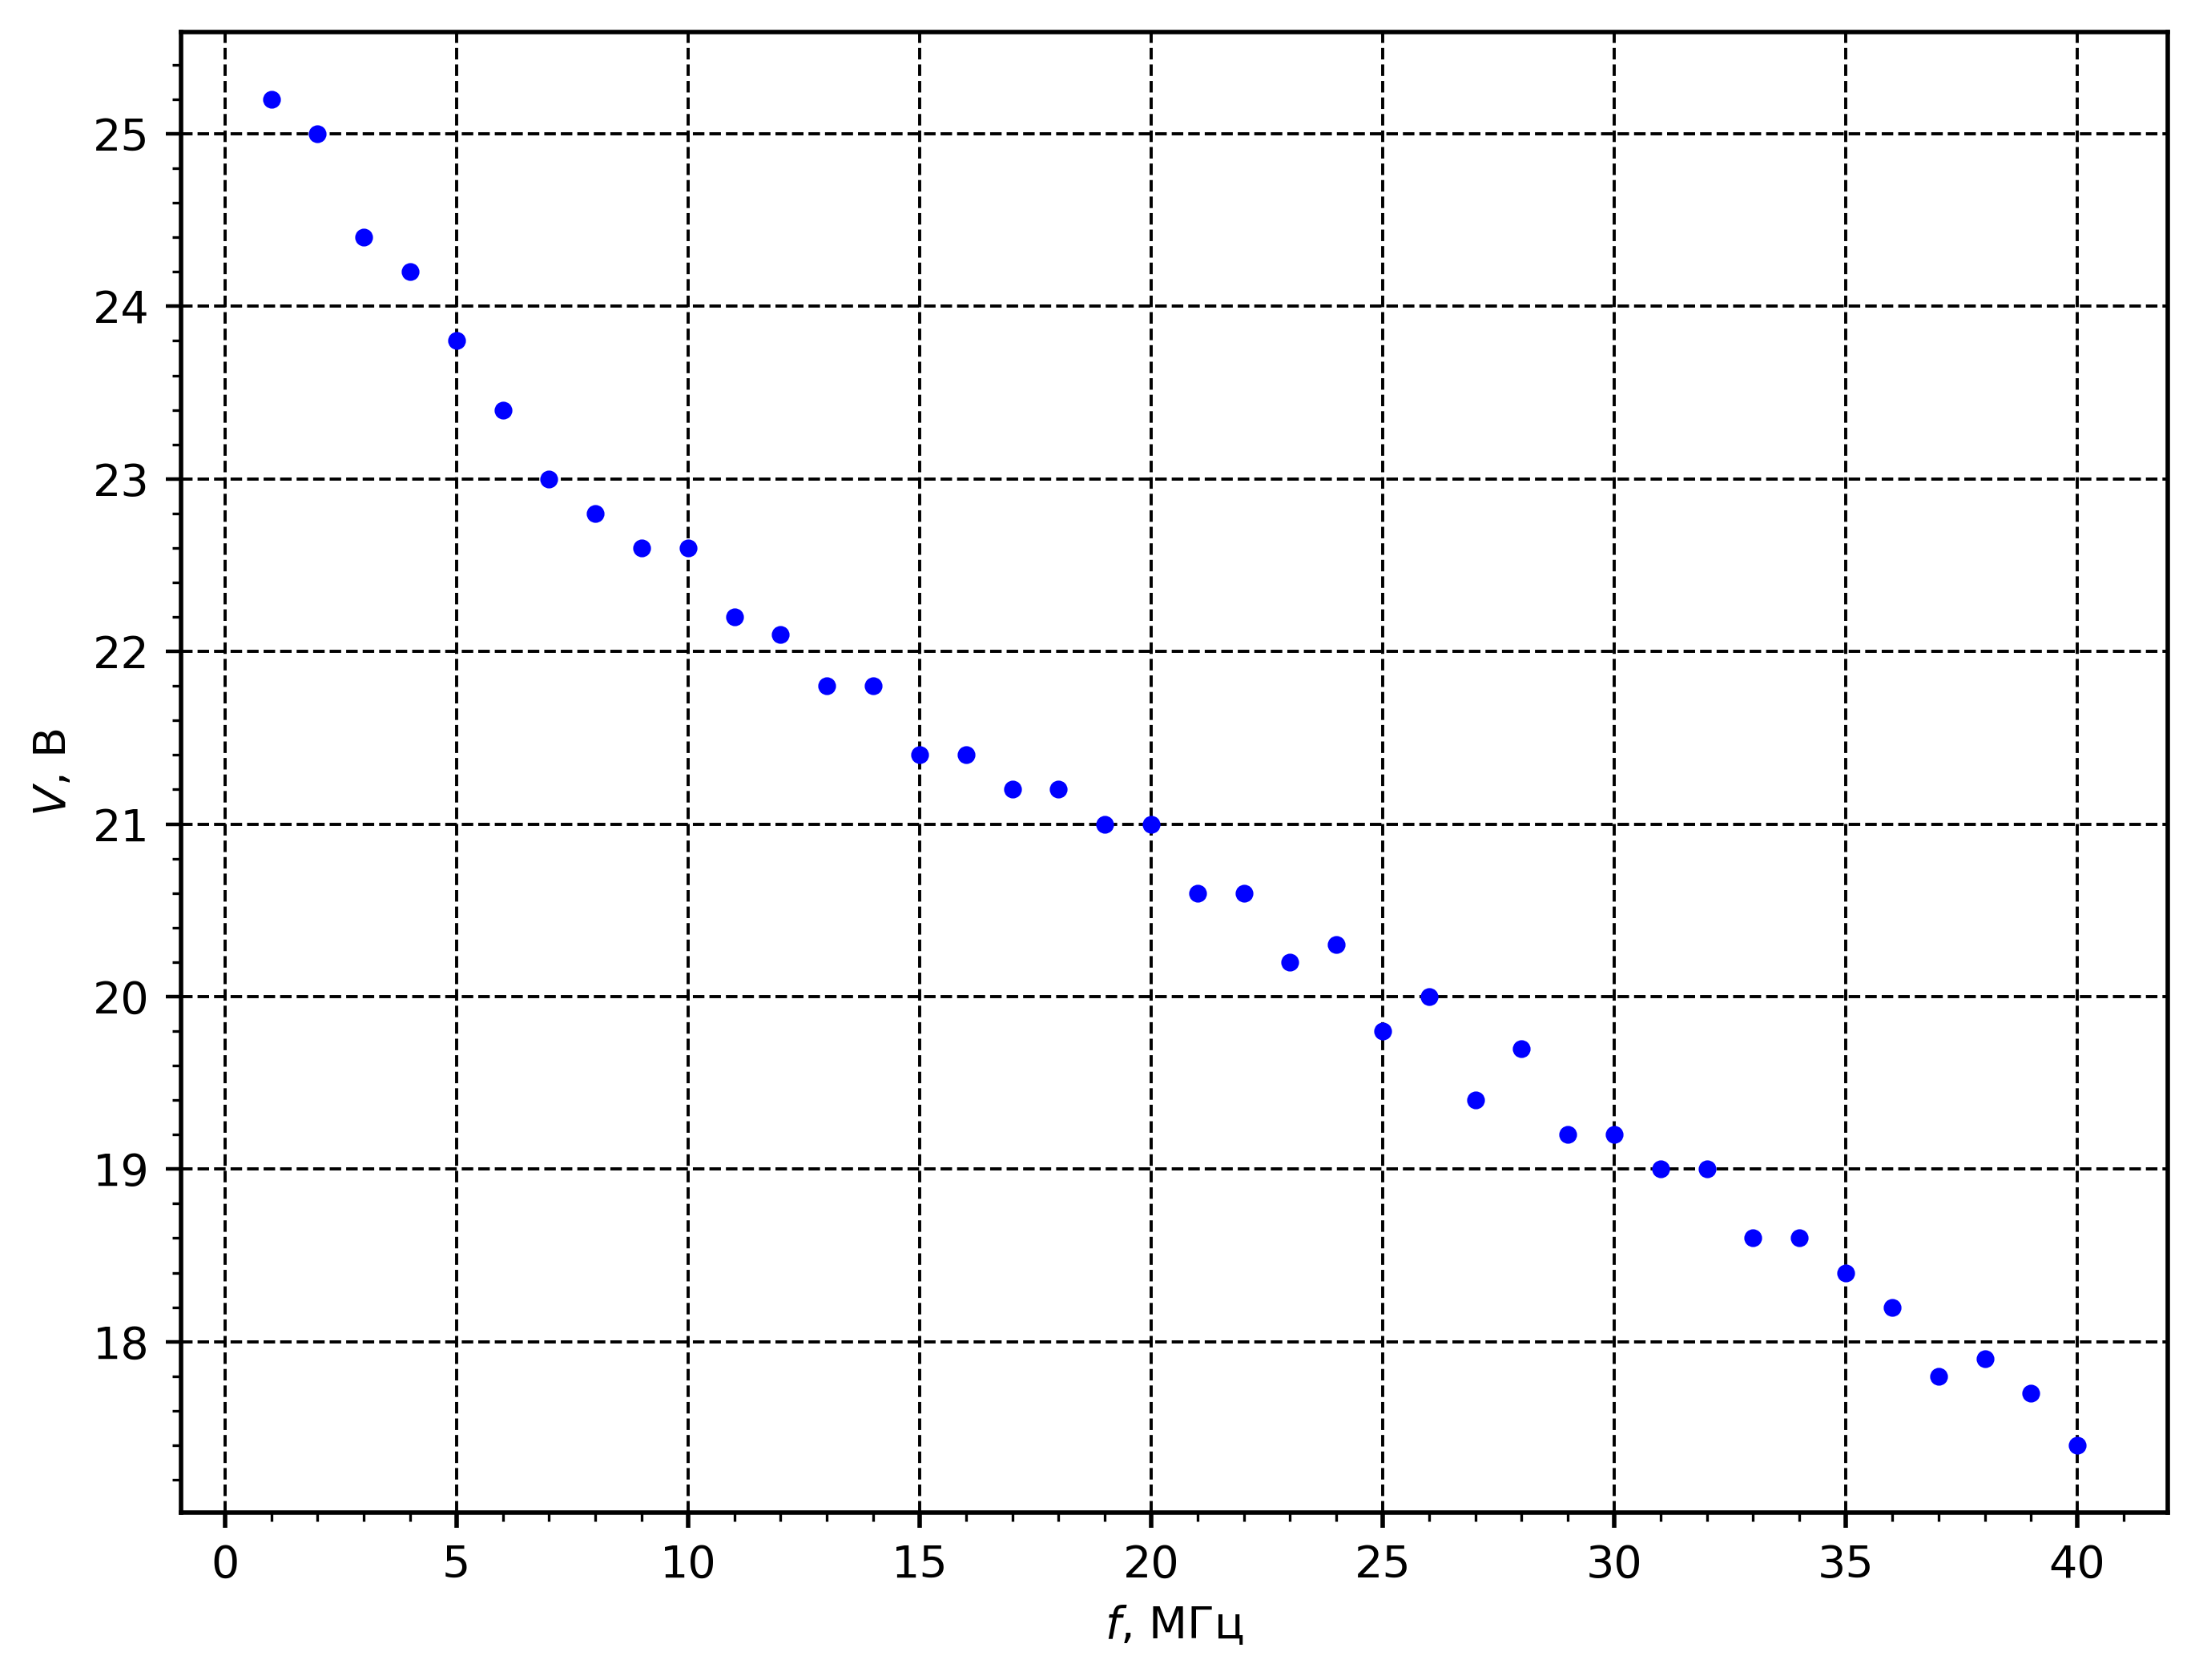

In [7]:
achh_plot = lab.plot.Plot(yl="$V$", xl="$f$")
achh_plot.plot(achh["f"], achh["v"], fmt=".")
achh_plot.save("../img/achh.png")

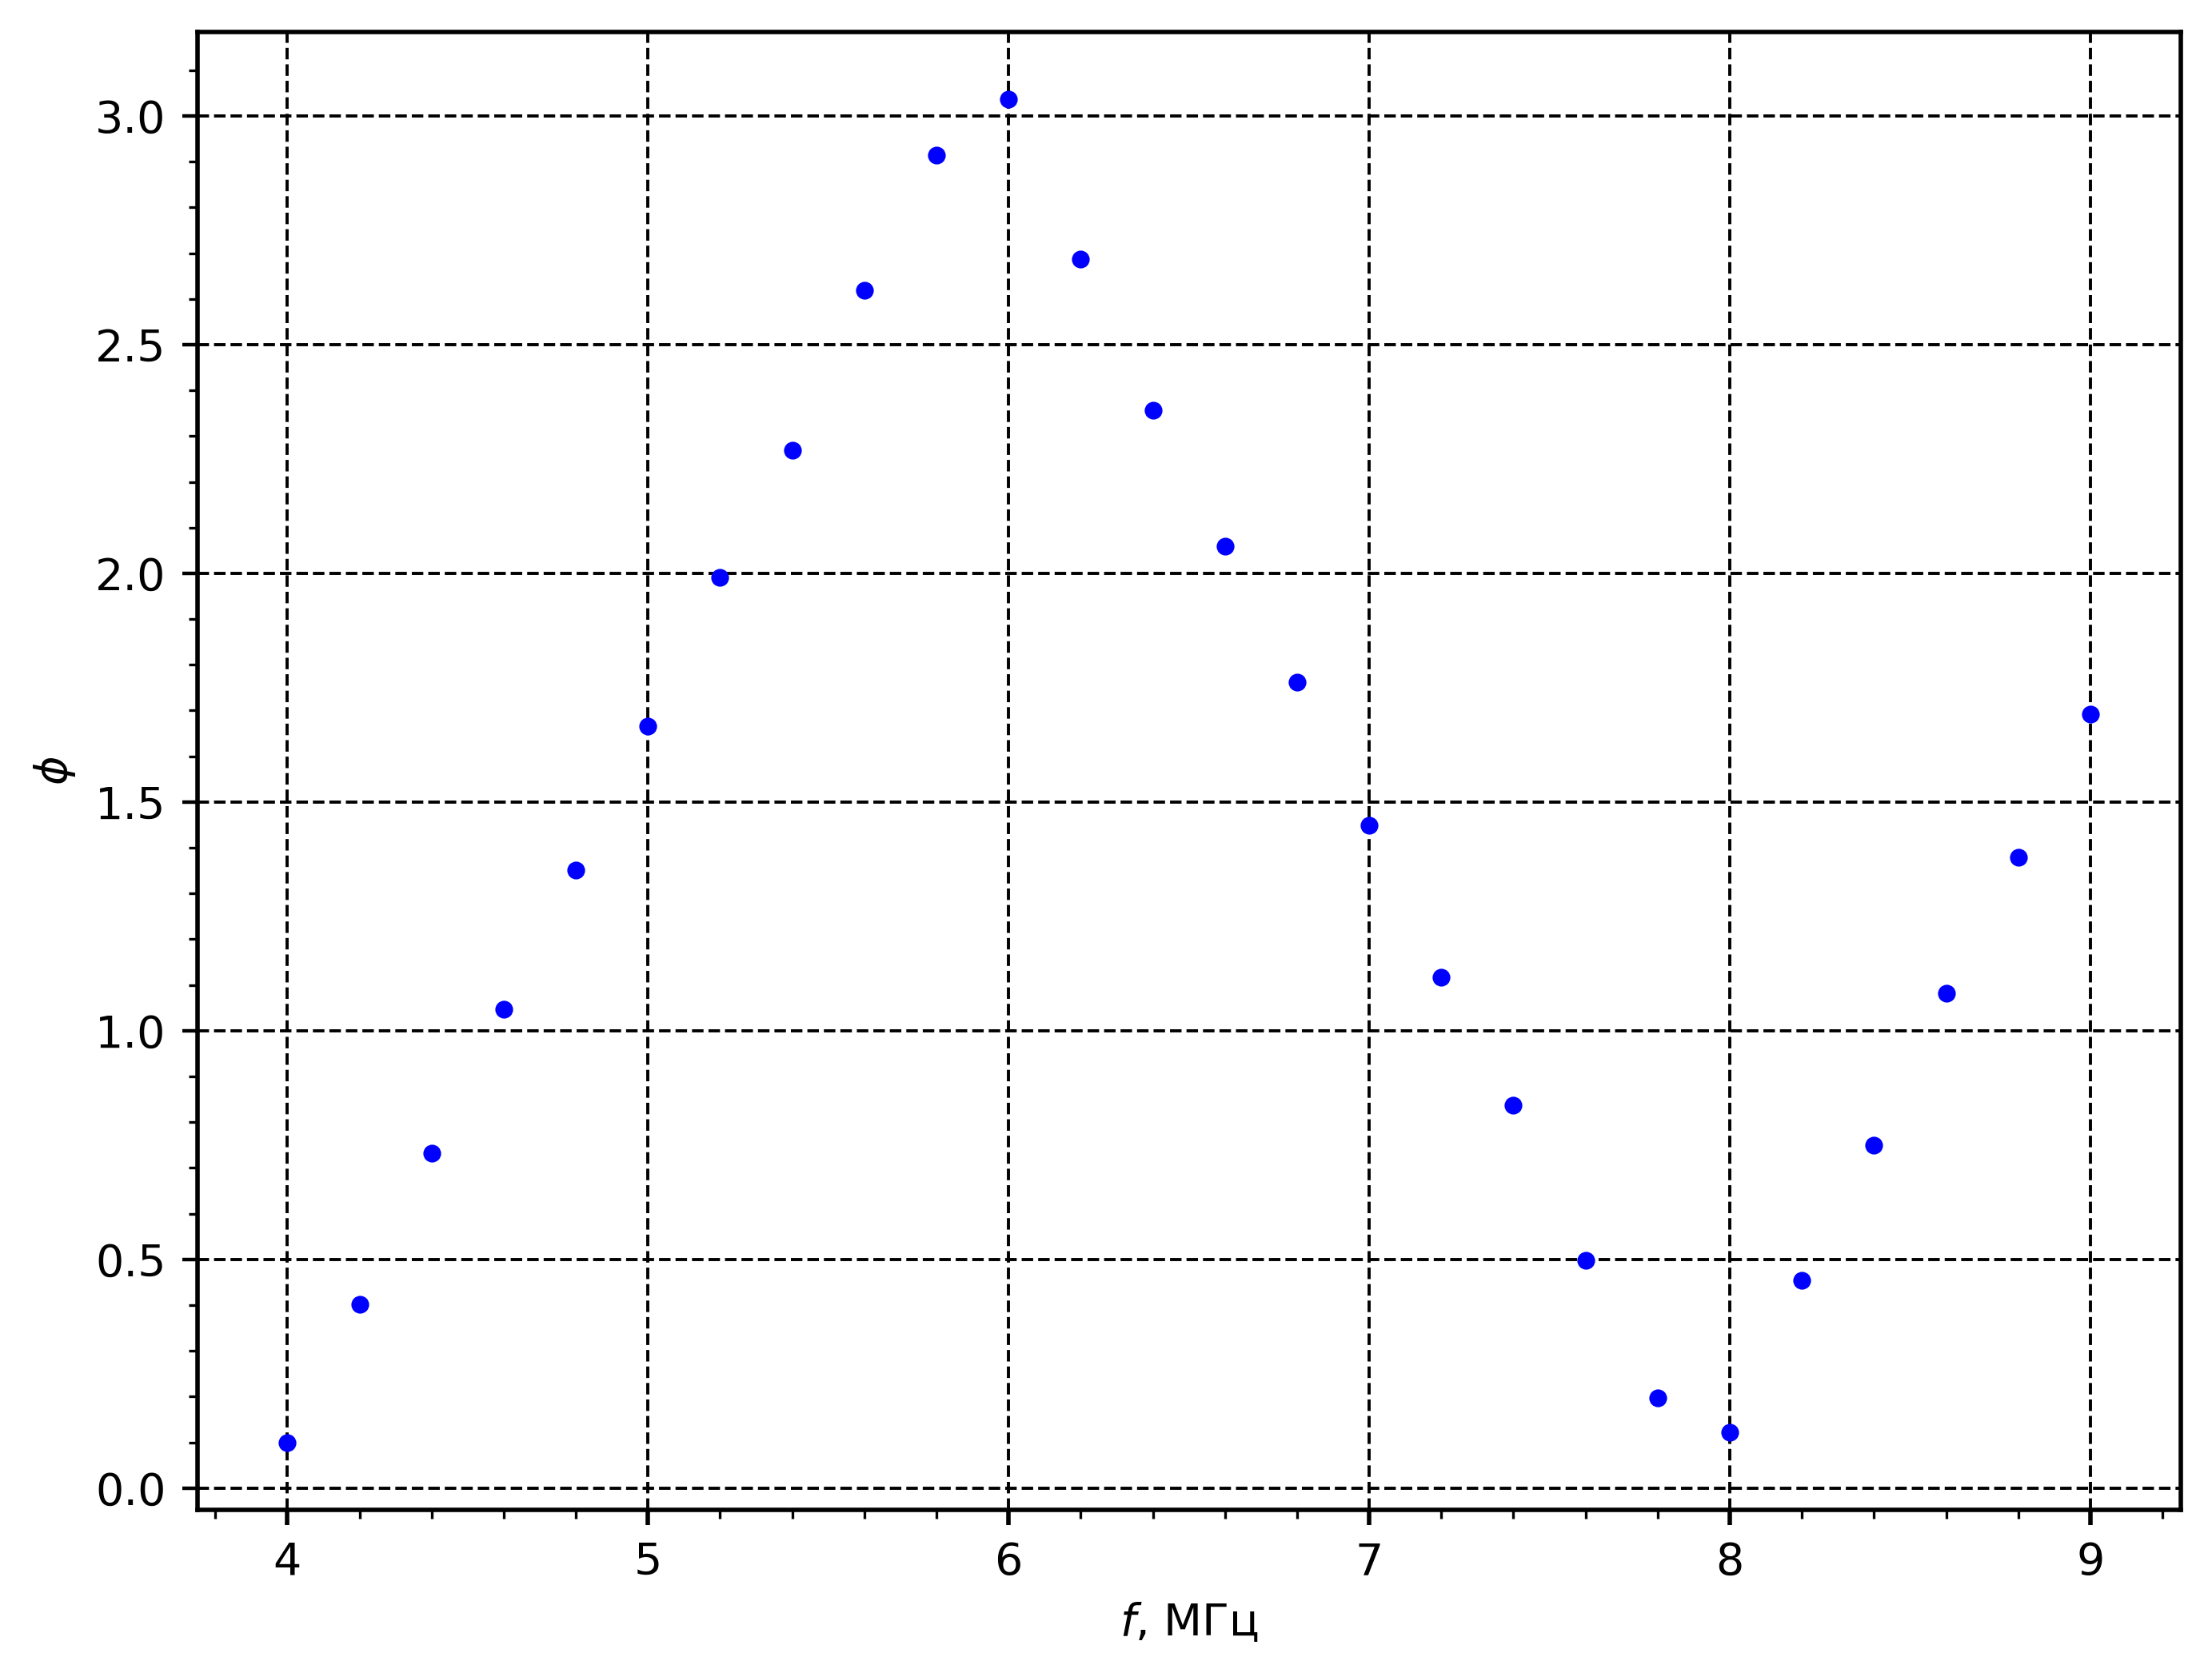

In [8]:
fchh_plot = lab.plot.Plot(yl="$\phi$", xl="$f$")
fchh_plot.plot(fchh["f"], fchh["phi"], fmt=".")
fchh_plot.save("../img/fchh.png")

In [9]:
achh["w"] = achh["f"] * 2 * const.pi
achh["k^2"] = achh["w"] ** 2 / V_f ** 2
achh["alpha^2"] = (mmath.log(arr.Array(U_0_1) / achh["v"]) / l) ** 2
achh["y"] = achh["k^2"] - achh["alpha^2"]
achh["x"] = achh["w"] ** 2

In [10]:
k1, b1 = lf.lsq(achh["x"], achh["y"])
print(f"k1 = {k1}\nb1 = {b1}")

k1 = (2.4998942+/-0.0000020)e-05 / megahertz ** 2 / meter ** 2
b1 = (-7.2+/-0.6)e-06 / meter ** 2


In [11]:
utils.totex(k1)

\left(2499894 \pm 2\right)\cdot 10^{-11}\;\text{МГц}^{-2}\cdot\text{м}^{-2}


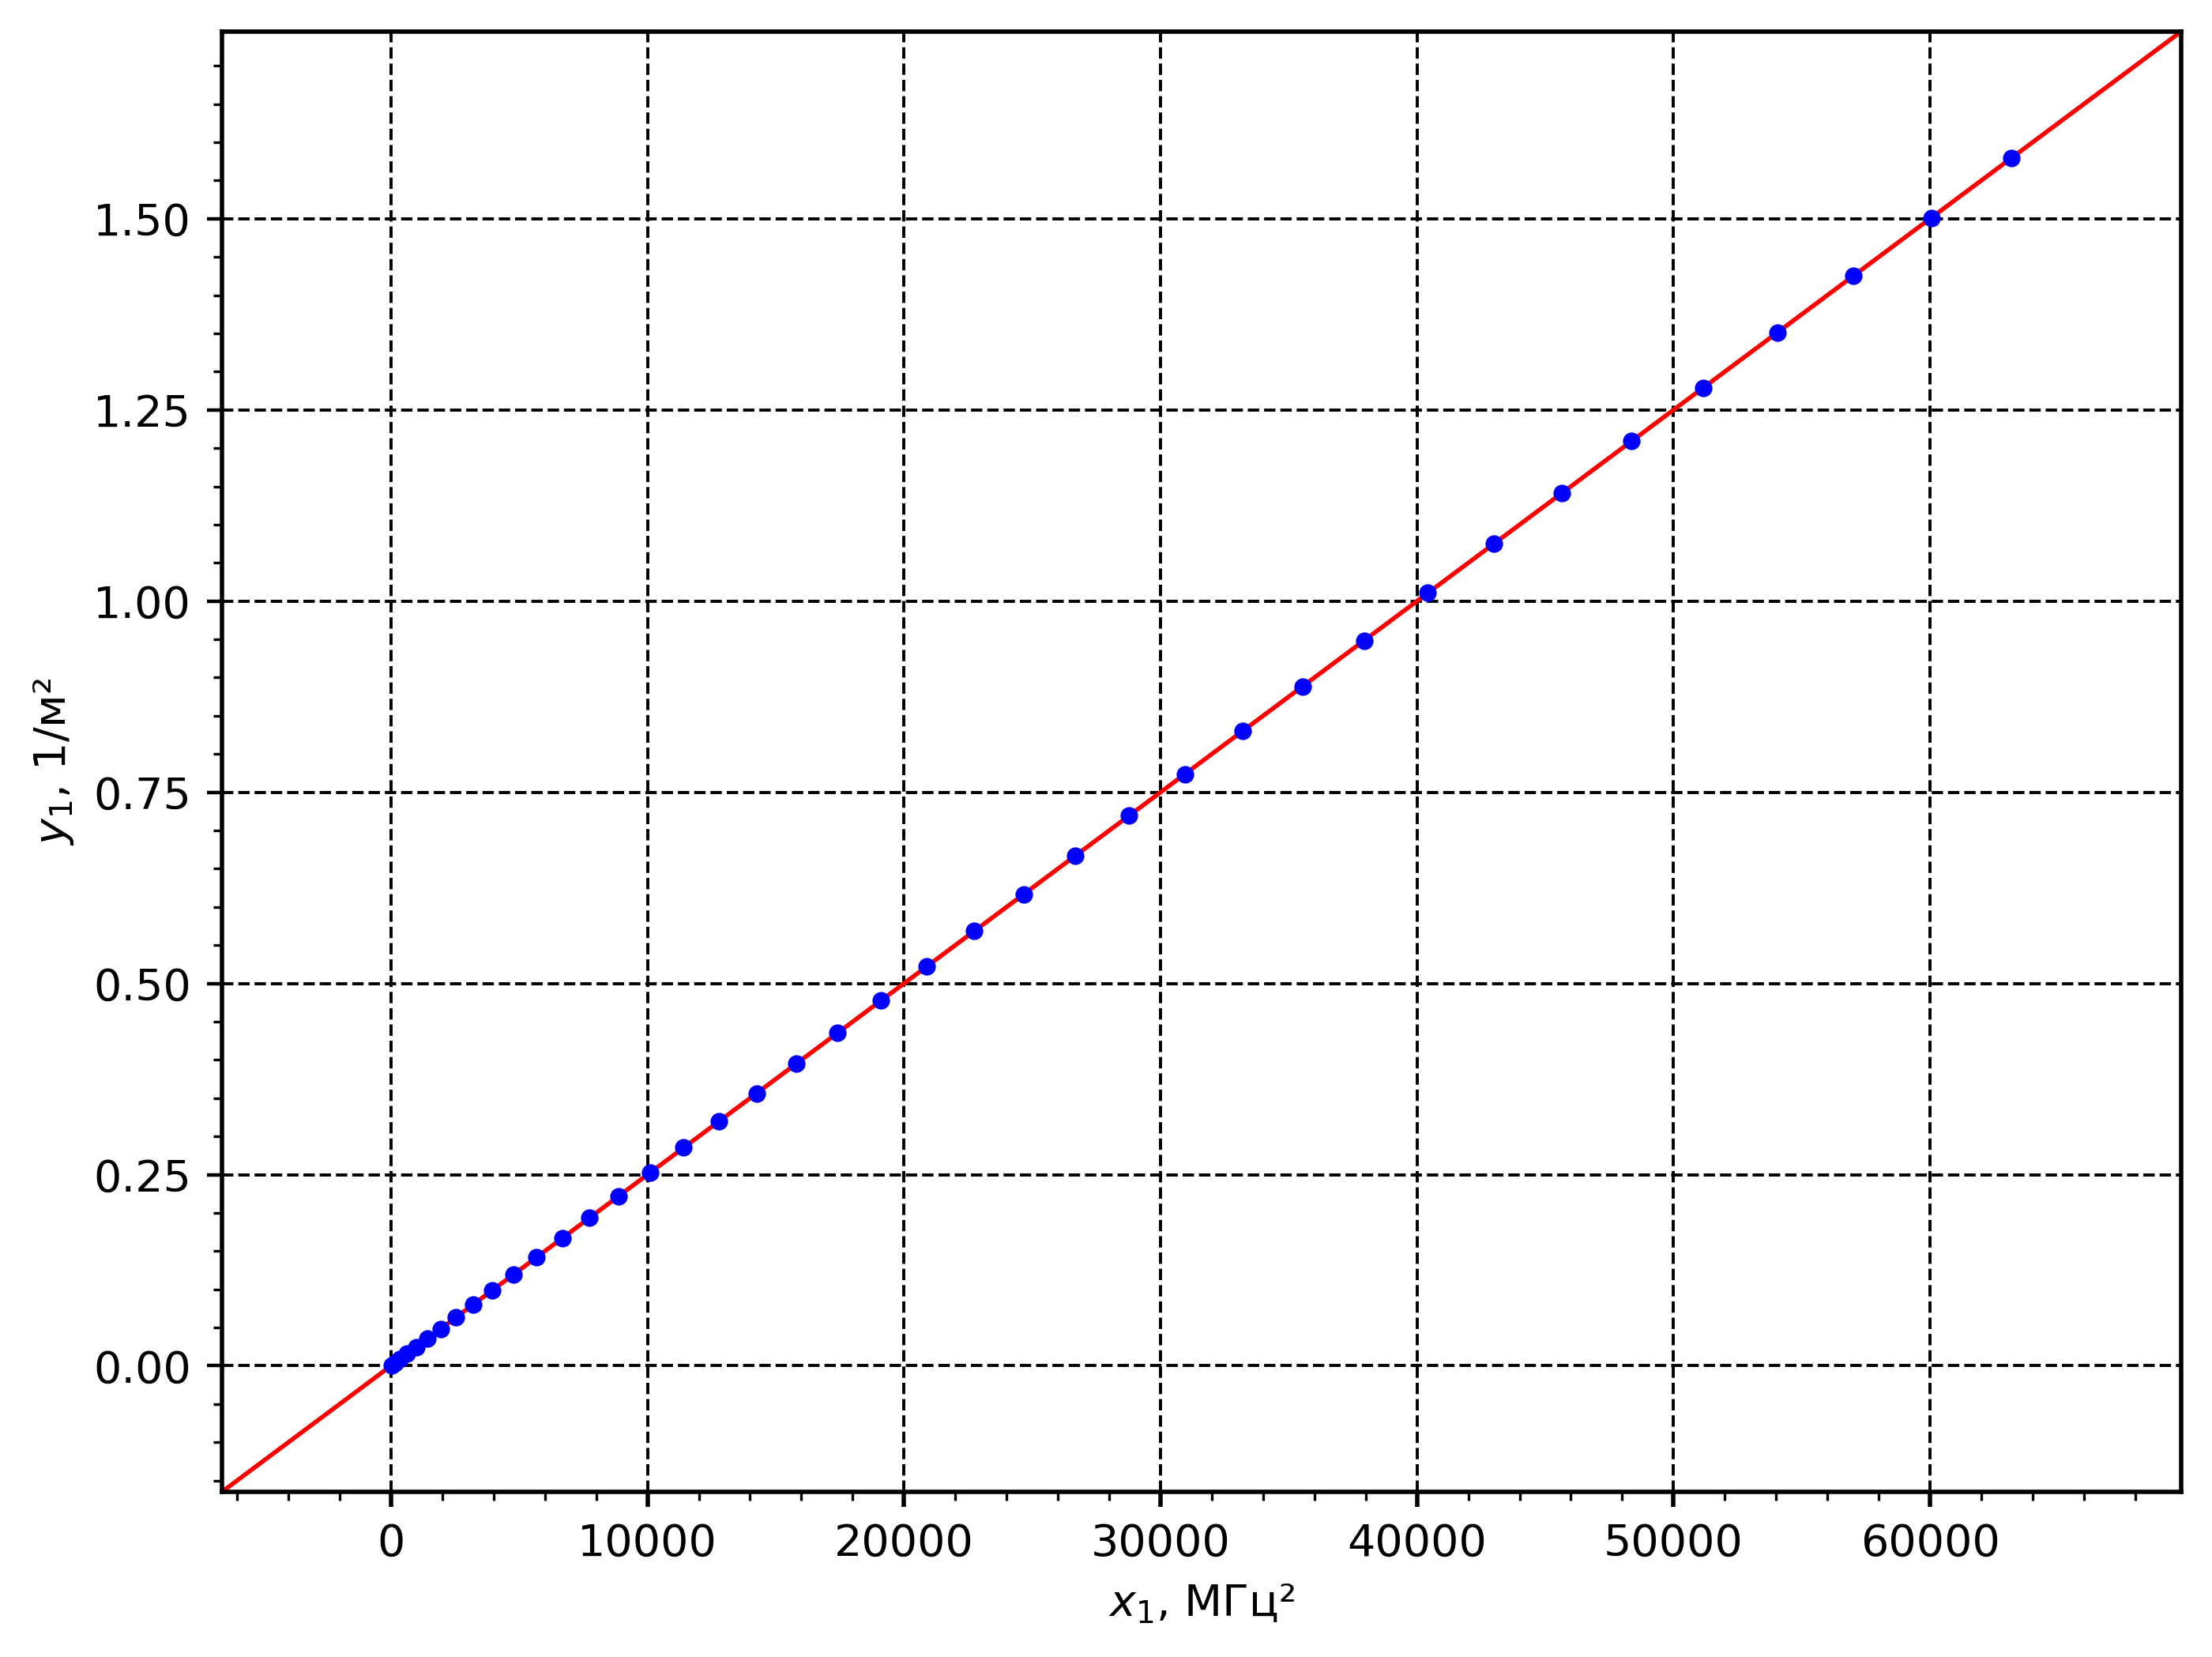

In [12]:
line1 = lab.plot.Plot(yl="$y_1$", xl="$x_1$")
line1.plot(achh["x"], achh["y"], fmt=".")
line1.line(k1, b1, color="red")
line1.save("../img/line1.png")

In [13]:
k1_ = k1.m / 1e4 / 1e12
R0 = 50 * 1.11e-12
Cx_ = mmath._sqrt(k1_ * u("dimensionless")) / R0
Lx_ = mmath._sqrt(k1_ * u("dimensionless")) * R0 * const.c.m ** 2 * 1e4
r1 = 1.39 / 2 * u("mm")
r2 = 4 / 2 * u("mm")
mu = Lx_ / 2 / mmath._log(r2 / r1)
eps = Cx_ * 2 * mmath._log(r2 / r1)
Cx = Cx_ / 9e11 * 100 * u("F/m")
Lx = Lx_ * 1e9 * 100 / const.c.m ** 2 * u("H/m")
Cx.ito("nF/m")
Lx.ito("H/m")
Cx, Lx, mu, eps

(0.10009798182017564+/-4.071903173615427e-08 <Unit('nanofarad / meter')>,
 2.7749412765143647e-06+/-1.1288231775476026e-12 <Unit('henry / meter')>,
 1.1797611113940432+/-4.799170698789457e-07 <Unit('dimensionless')>,
 1.9044472907159122+/-7.747134183964527e-07 <Unit('dimensionless')>)

In [14]:
utils.totex(Lx)
utils.totex(Cx)
utils.totex(mu)
utils.totex(eps)

\left(2774941{,}3 \pm 1{,}1\right)\cdot 10^{-12}\;\text{Гн} / \text{м}
\left(10009798 \pm 4\right)\cdot 10^{-8}\;\text{нФ} / \text{м}
\left(11797611 \pm 5\right)\cdot 10^{-7}\;
\left(19044473 \pm 8\right)\cdot 10^{-7}\;


In [15]:
k2, b2 = lf.lsq(mmath.sqrt(achh["f"])[:20], mmath.sqrt(achh["alpha^2"])[:20])
print(f"k2 = {k2}\nb2 = {b2}")

k2 = 0.001141+/-0.000024 / megahertz ** 0.5 / meter
b2 = (-8+/-8)e-05 / meter


In [16]:
utils.totex(k2)

\left(114 \pm 2\right)\cdot 10^{-5}\;\text{МГц}^{-0.5}\cdot\text{м}^{-1.0}


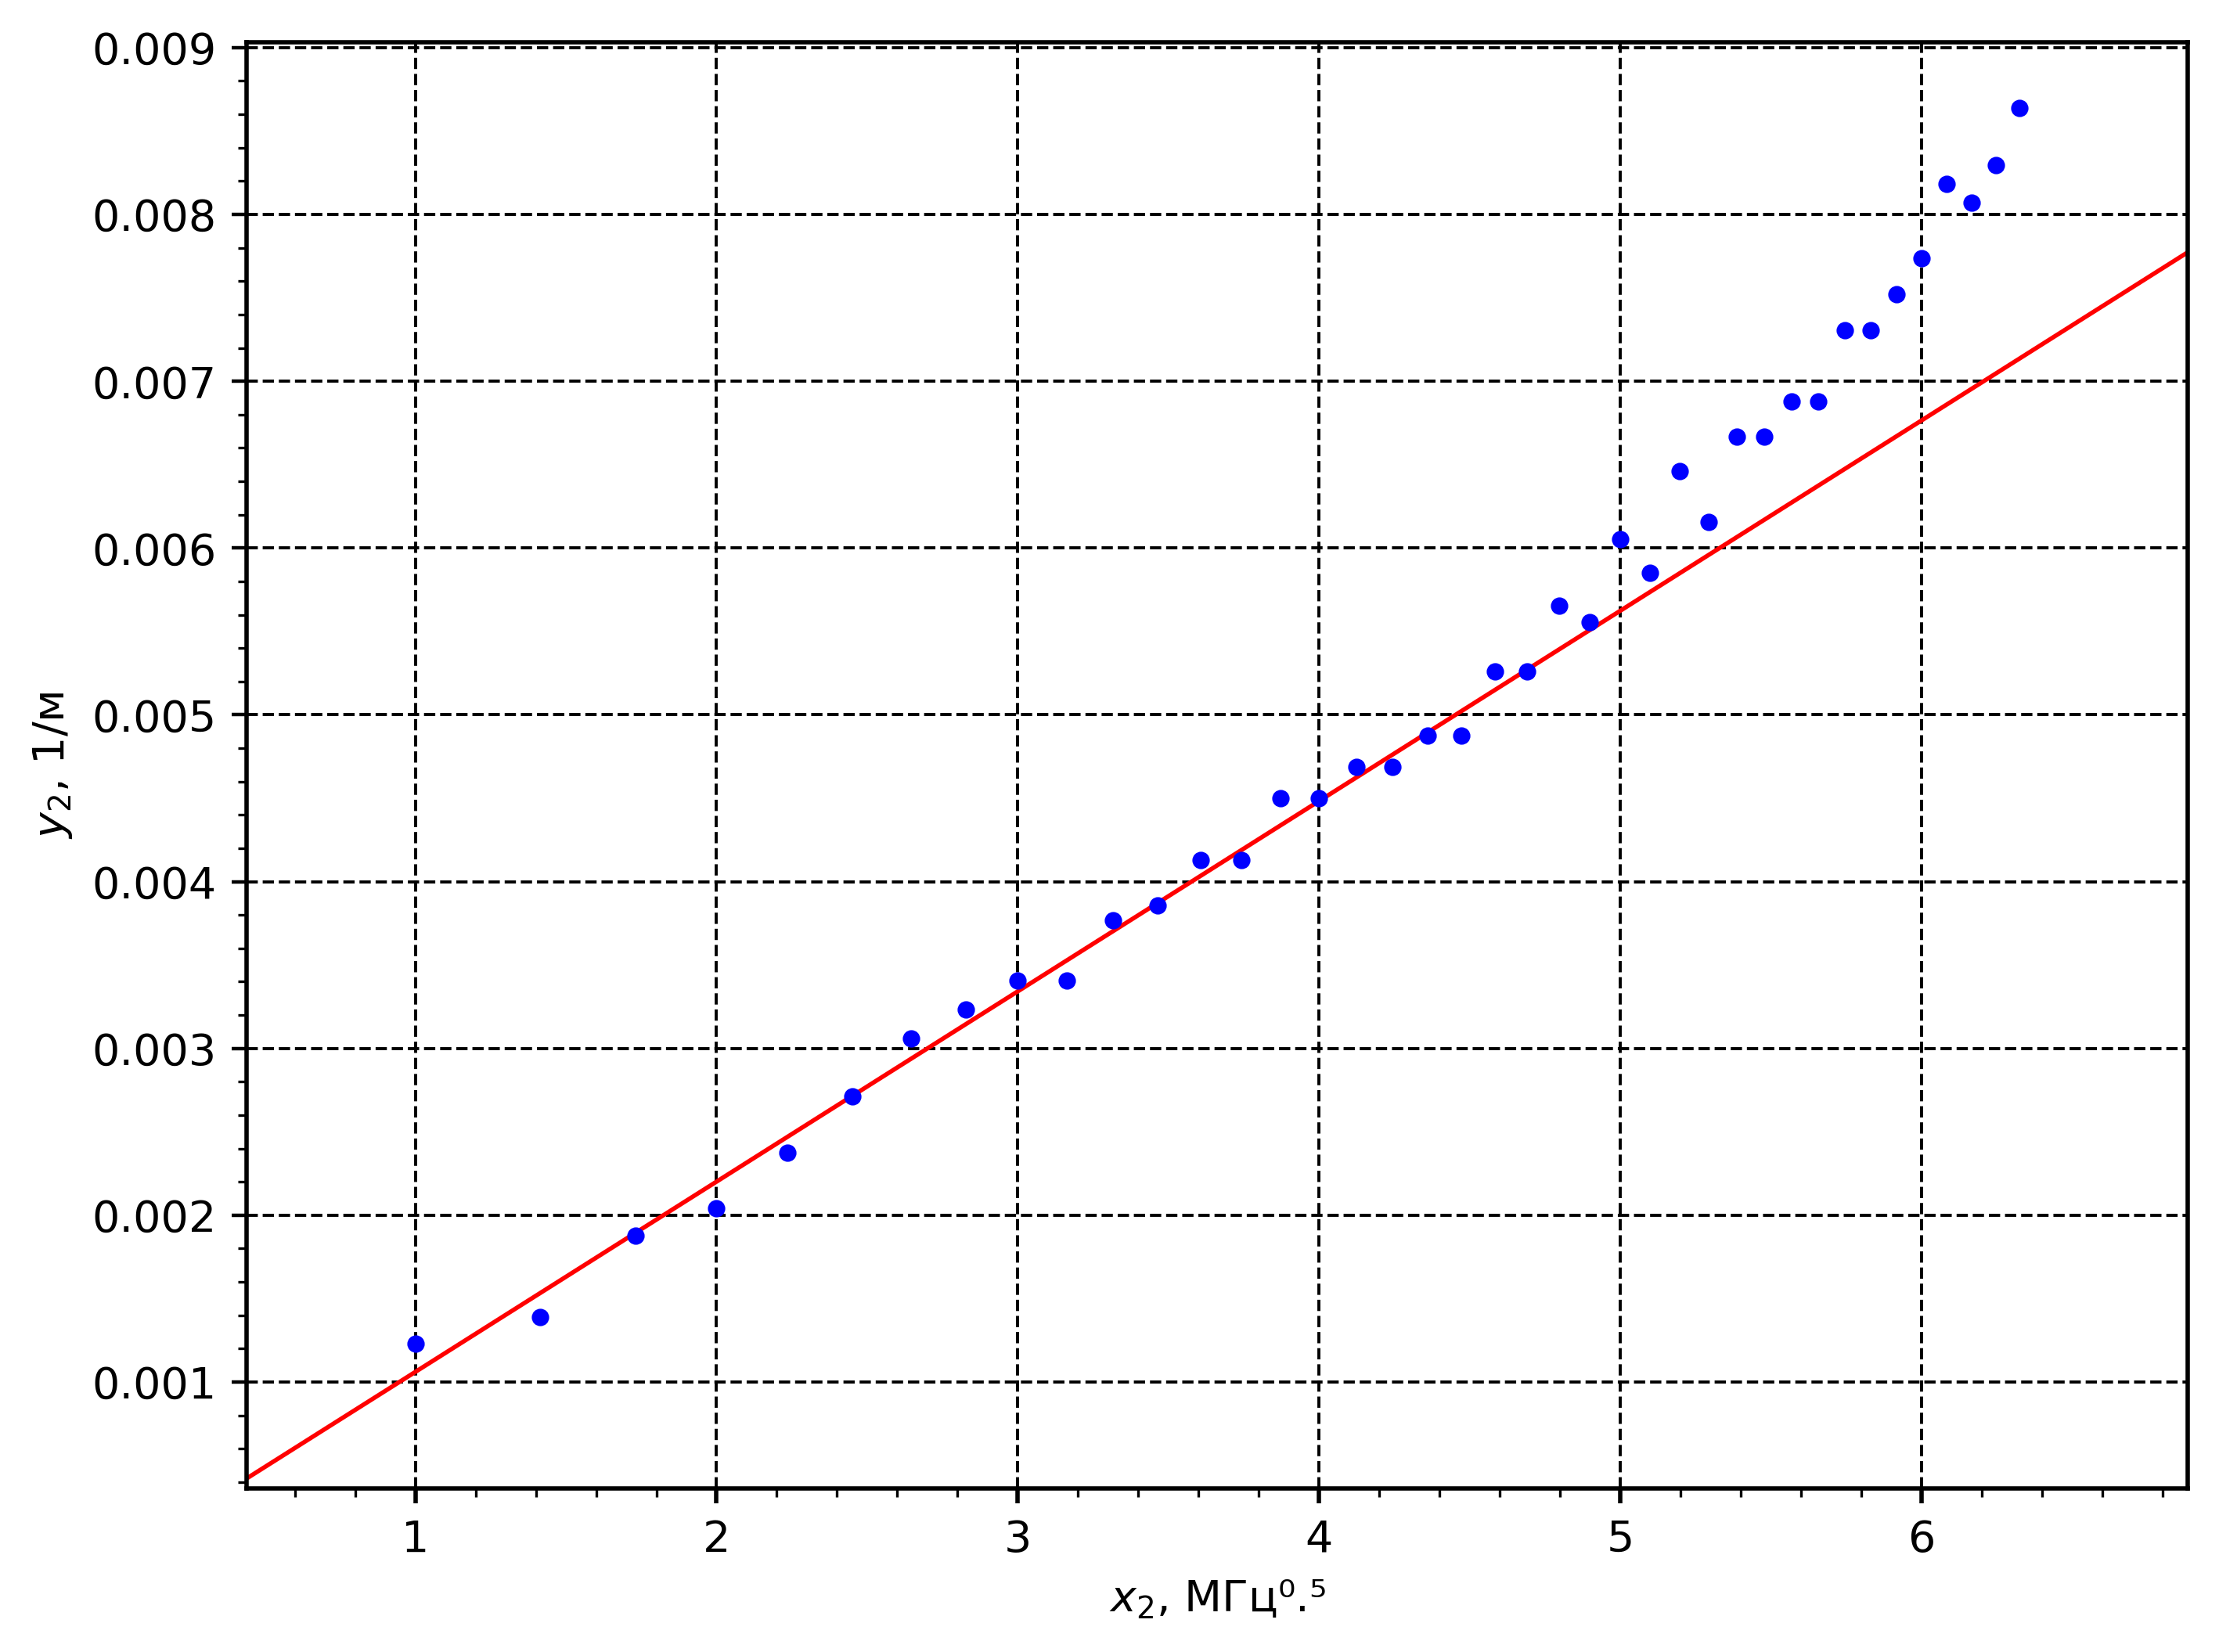

In [17]:
line2 = lab.plot.Plot(yl="$y_2$", xl="$x_2$")
line2.plot(mmath.sqrt(achh["f"]), mmath.sqrt(achh["alpha^2"]), fmt=".")
line2.line(k2, b2, color="red")
line2.save("../img/line2.png")

In [18]:
d = 0.137
sigma1_ = ((2 * Cx_ * V_f.m*100) / (const.c.m * 100 * d * k2.m / 1e3 / 1e2)) ** 2
sigma1 = sigma1_ * 1.11265e-10 * u("S/m")
sigma1

65783500.61084932+/-2720002.0142493425 <Unit('siemens / meter')>

In [19]:
utils.totex(sigma1)

\left(66 \pm 3\right)\cdot 10^{6}\;\text{См} / \text{м}


In [20]:
k3, b3 = lf.lsq(achh["f"][:20] ** 1.5, mmath.sqrt(achh["alpha^2"] * achh["k^2"])[:20])
print(f"k3 = {k3}\nb3 = {b3}")

k3 = (3.509+/-0.028)e-05 / megahertz ** 1.5 / meter ** 2
b3 = (0.2+/-1.3)e-05 / meter ** 2


In [23]:
utils.totex(k3)

\left(351 \pm 3\right)\cdot 10^{-7}\;\text{МГц}^{-1.5}\cdot\text{м}^{-2.0}


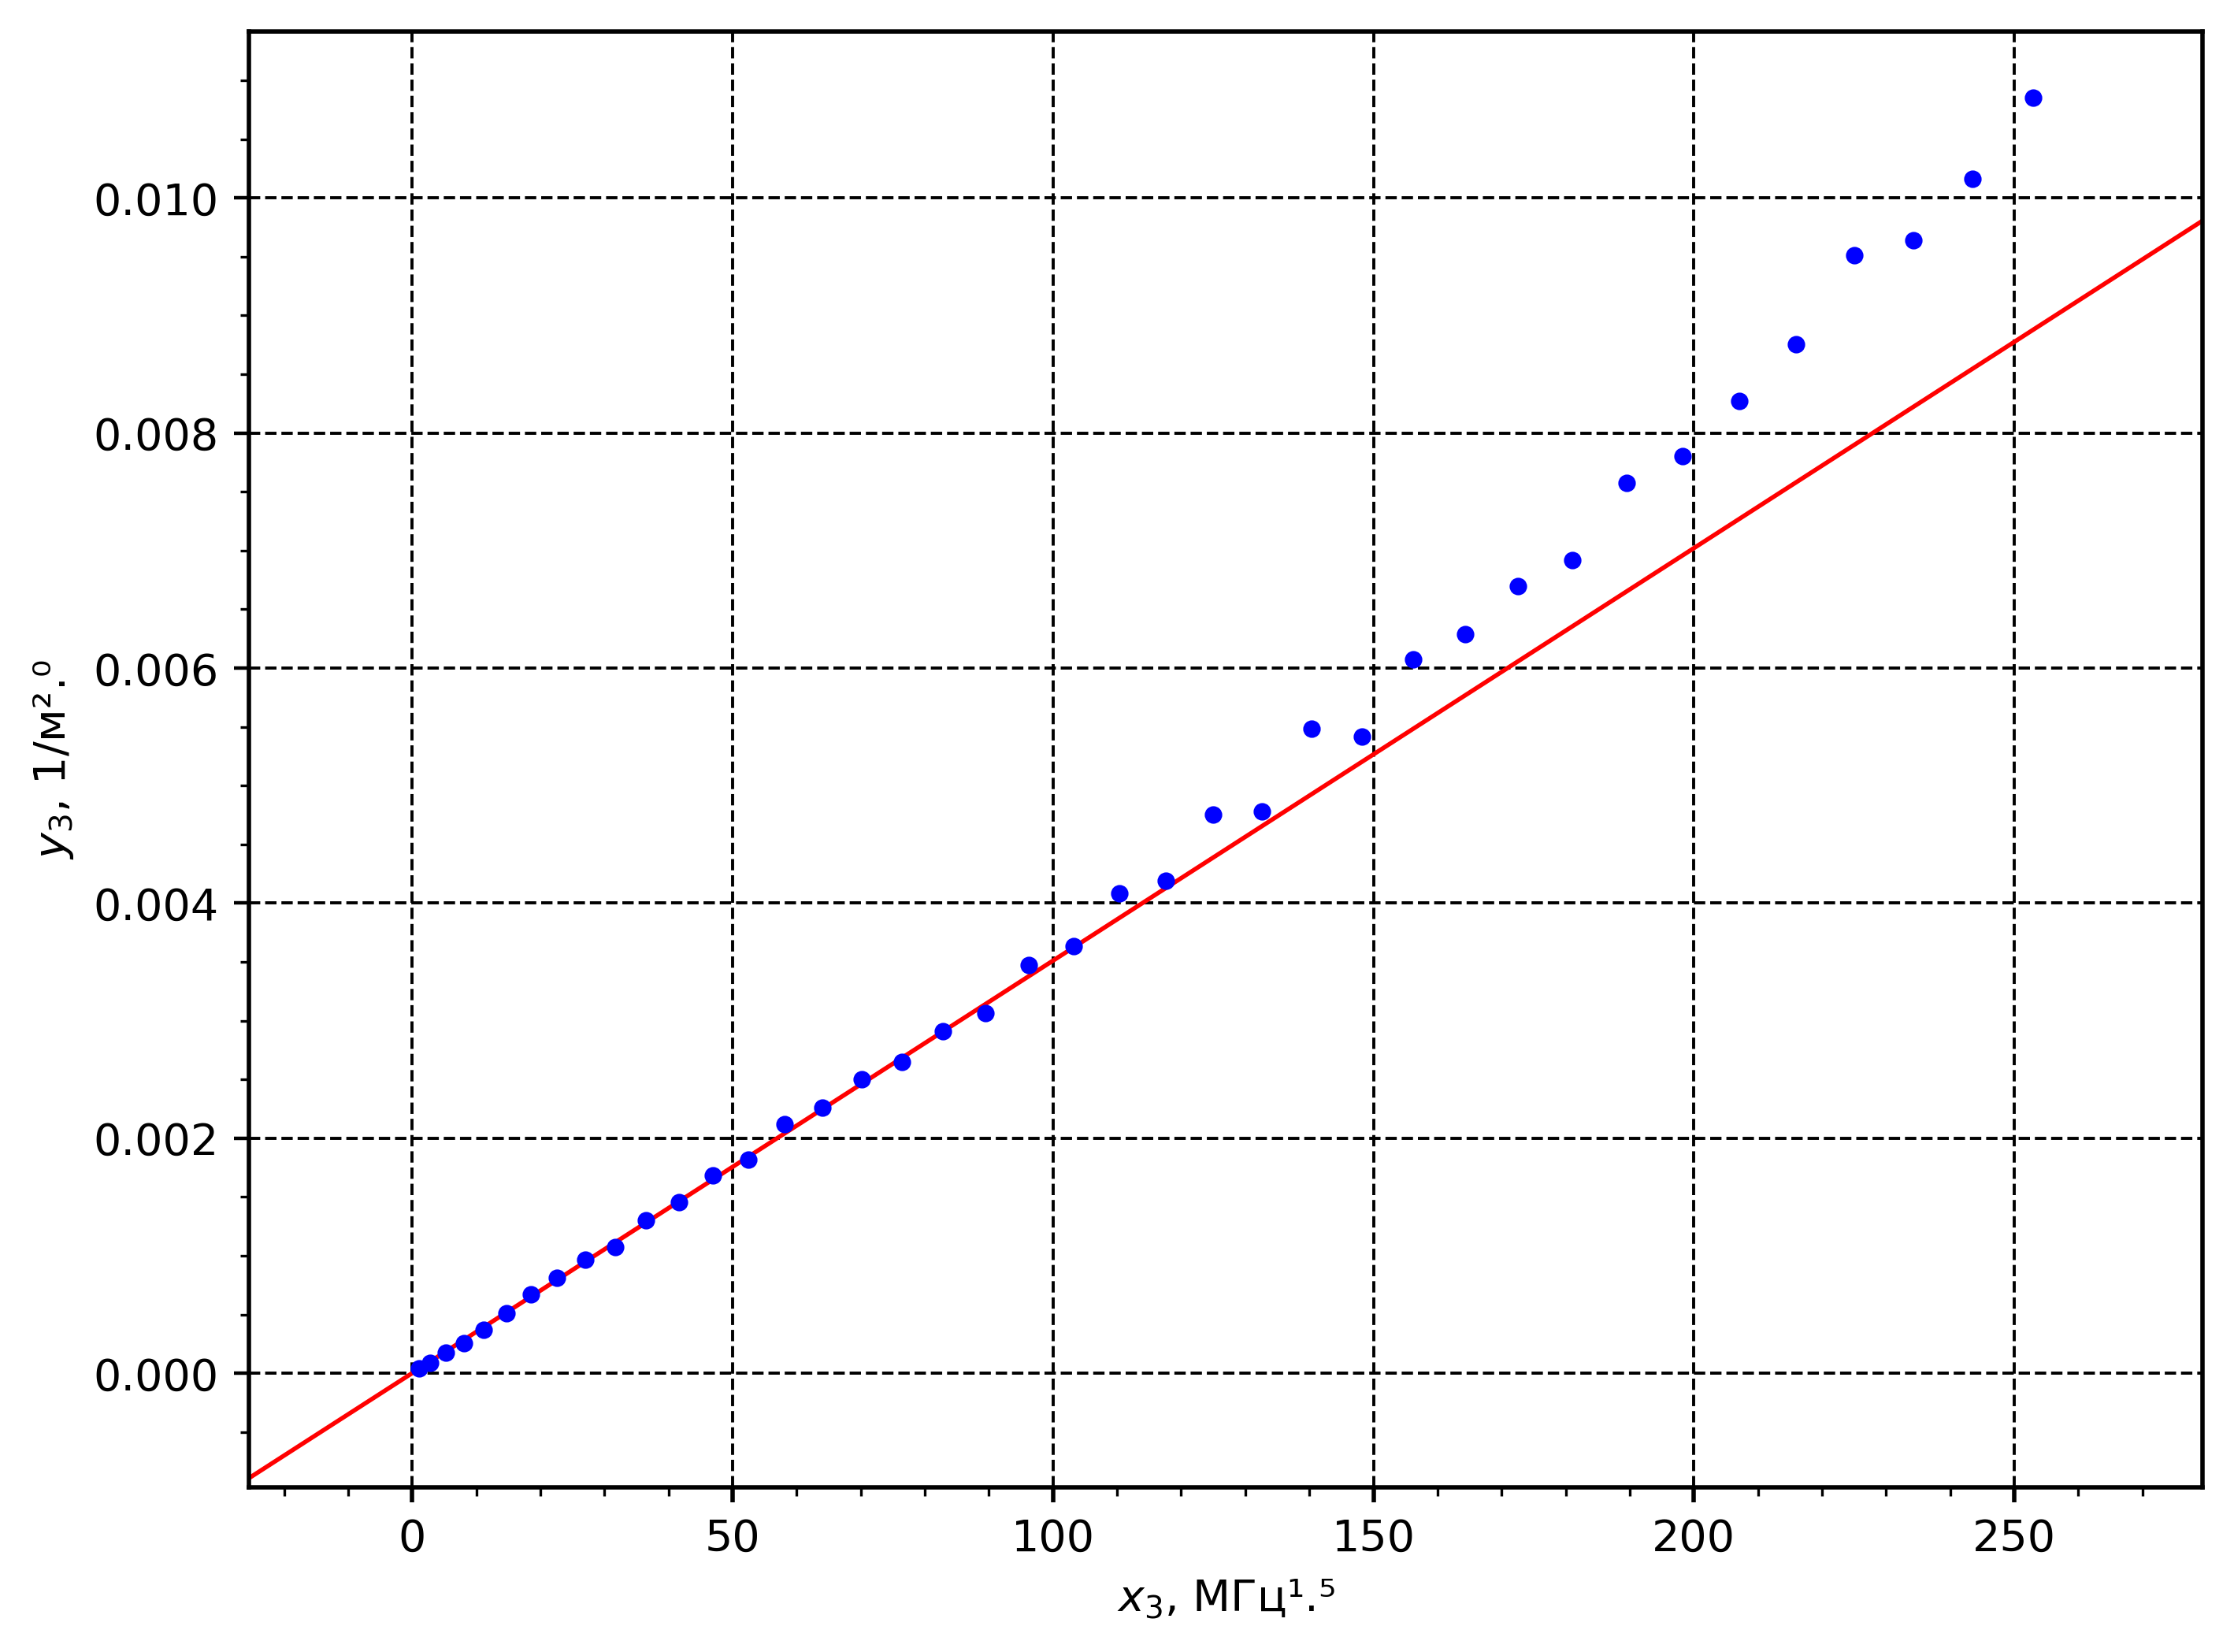

In [21]:
line3 = lab.plot.Plot(yl="$y_3$", xl="$x_3$")
line3.plot(achh["f"] ** 1.5, mmath.sqrt(achh["alpha^2"] * achh["k^2"]), fmt=".")
line3.line(k3, b3, color="red")
line3.save("../img/line3.png")

In [22]:
d = 0.137
sigma2_ = ((4 * const.pi * Cx_) / (const.c.m * 100 * d * k3.m / 1e9 / 1e4)) ** 2
sigma2 = sigma2_ * 1.11265e-10 * u("S/m")
sigma2

68656967.78341748+/-1103224.1696173013 <Unit('siemens / meter')>

In [24]:
utils.totex(sigma2)

\left(68{,}7 \pm 1{,}1\right)\cdot 10^{6}\;\text{См} / \text{м}


In [40]:
data = lab.data.Data("../data/shit.csv")
utils.totex(data, file="../tex/shit.tex", columns={"phi": "\\varphi", "f": "f"})
data.head(5)

,f,phi
0,10.0 kilohertz,2.0158552860534504 dimensionless
1,13.0 kilohertz,-2.5132741228718345 dimensionless
2,16.0 kilohertz,-1.9722220547535925 dimensionless
3,19.0 kilohertz,-1.4660765716752369 dimensionless
4,22.0 kilohertz,0.2617993877991494 dimensionless


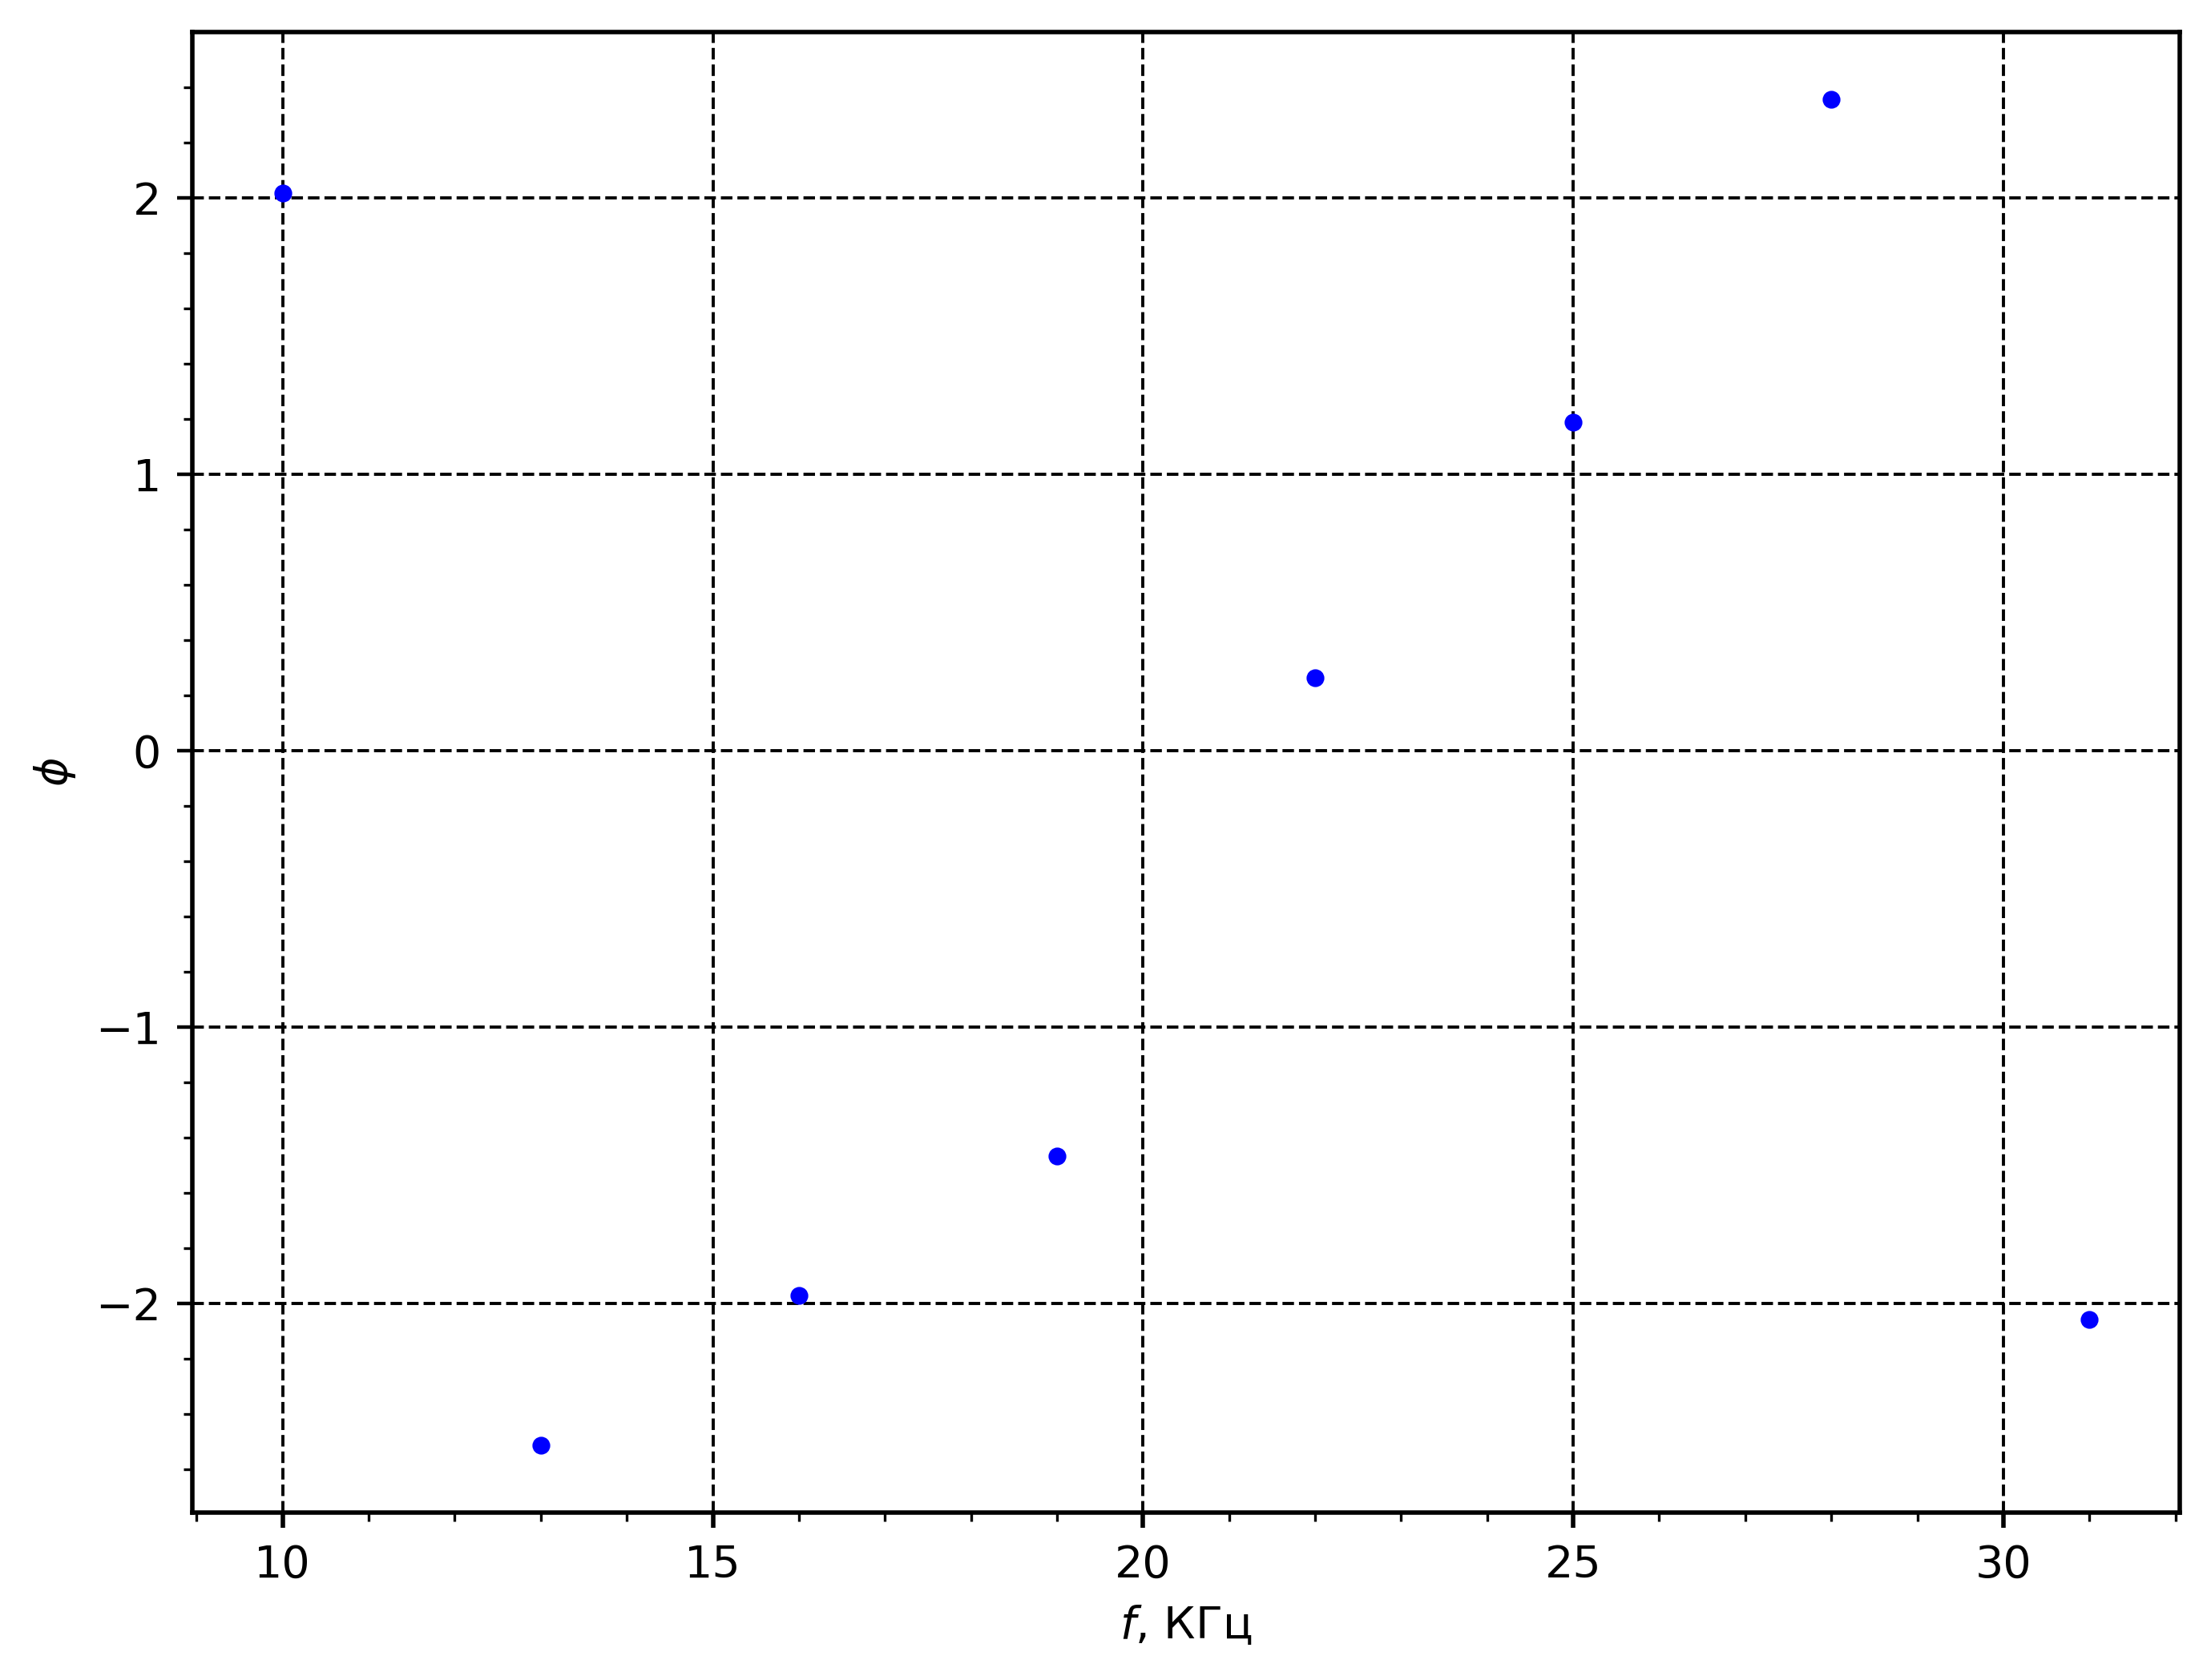

In [41]:
shit_plot = lab.plot.Plot(yl="$\phi$", xl="$f$")
shit_plot.plot(data["f"], data["phi"], fmt=".")
shit_plot.save("../img/shit.png")

In [32]:
data = lab.data.Data("../data/r2.csv")
utils.totex(data, file="../tex/r2.tex", columns={"f1": "f_{R=0}", "f2": "f_{R\\to\\infty}"})
data.head(5)

,f1,f2
0,11.2 kilohertz,10.7 kilohertz
1,21.2 kilohertz,20.6 kilohertz
2,29.0 kilohertz,28.4 kilohertz
3,34.6 kilohertz,33.8 kilohertz


In [42]:
data = lab.data.Data("../data/us.csv")
utils.totex(data, file="../tex/us.tex", columns={"N": "N",
                                                 "u1": "V_{f=10{,}7\\;\\text{КГц}}",
                                                 "u2": "V_{f=20{,}6\\;\\text{КГц}}",
                                                 "u3": "V_{f=28{,}4\\;\\text{КГц}}"})
data.head(5)

,N,u1,u2,u3
0,1.0 dimensionless,19.0 volt,13.0 volt,9.0 volt
1,2.0 dimensionless,10.0 volt,6.4 volt,12.8 volt
2,3.0 dimensionless,5.0 volt,14.6 volt,6.4 volt
3,4.0 dimensionless,9.4 volt,7.0 volt,7.6 volt
4,5.0 dimensionless,17.8 volt,11.2 volt,7.4 volt


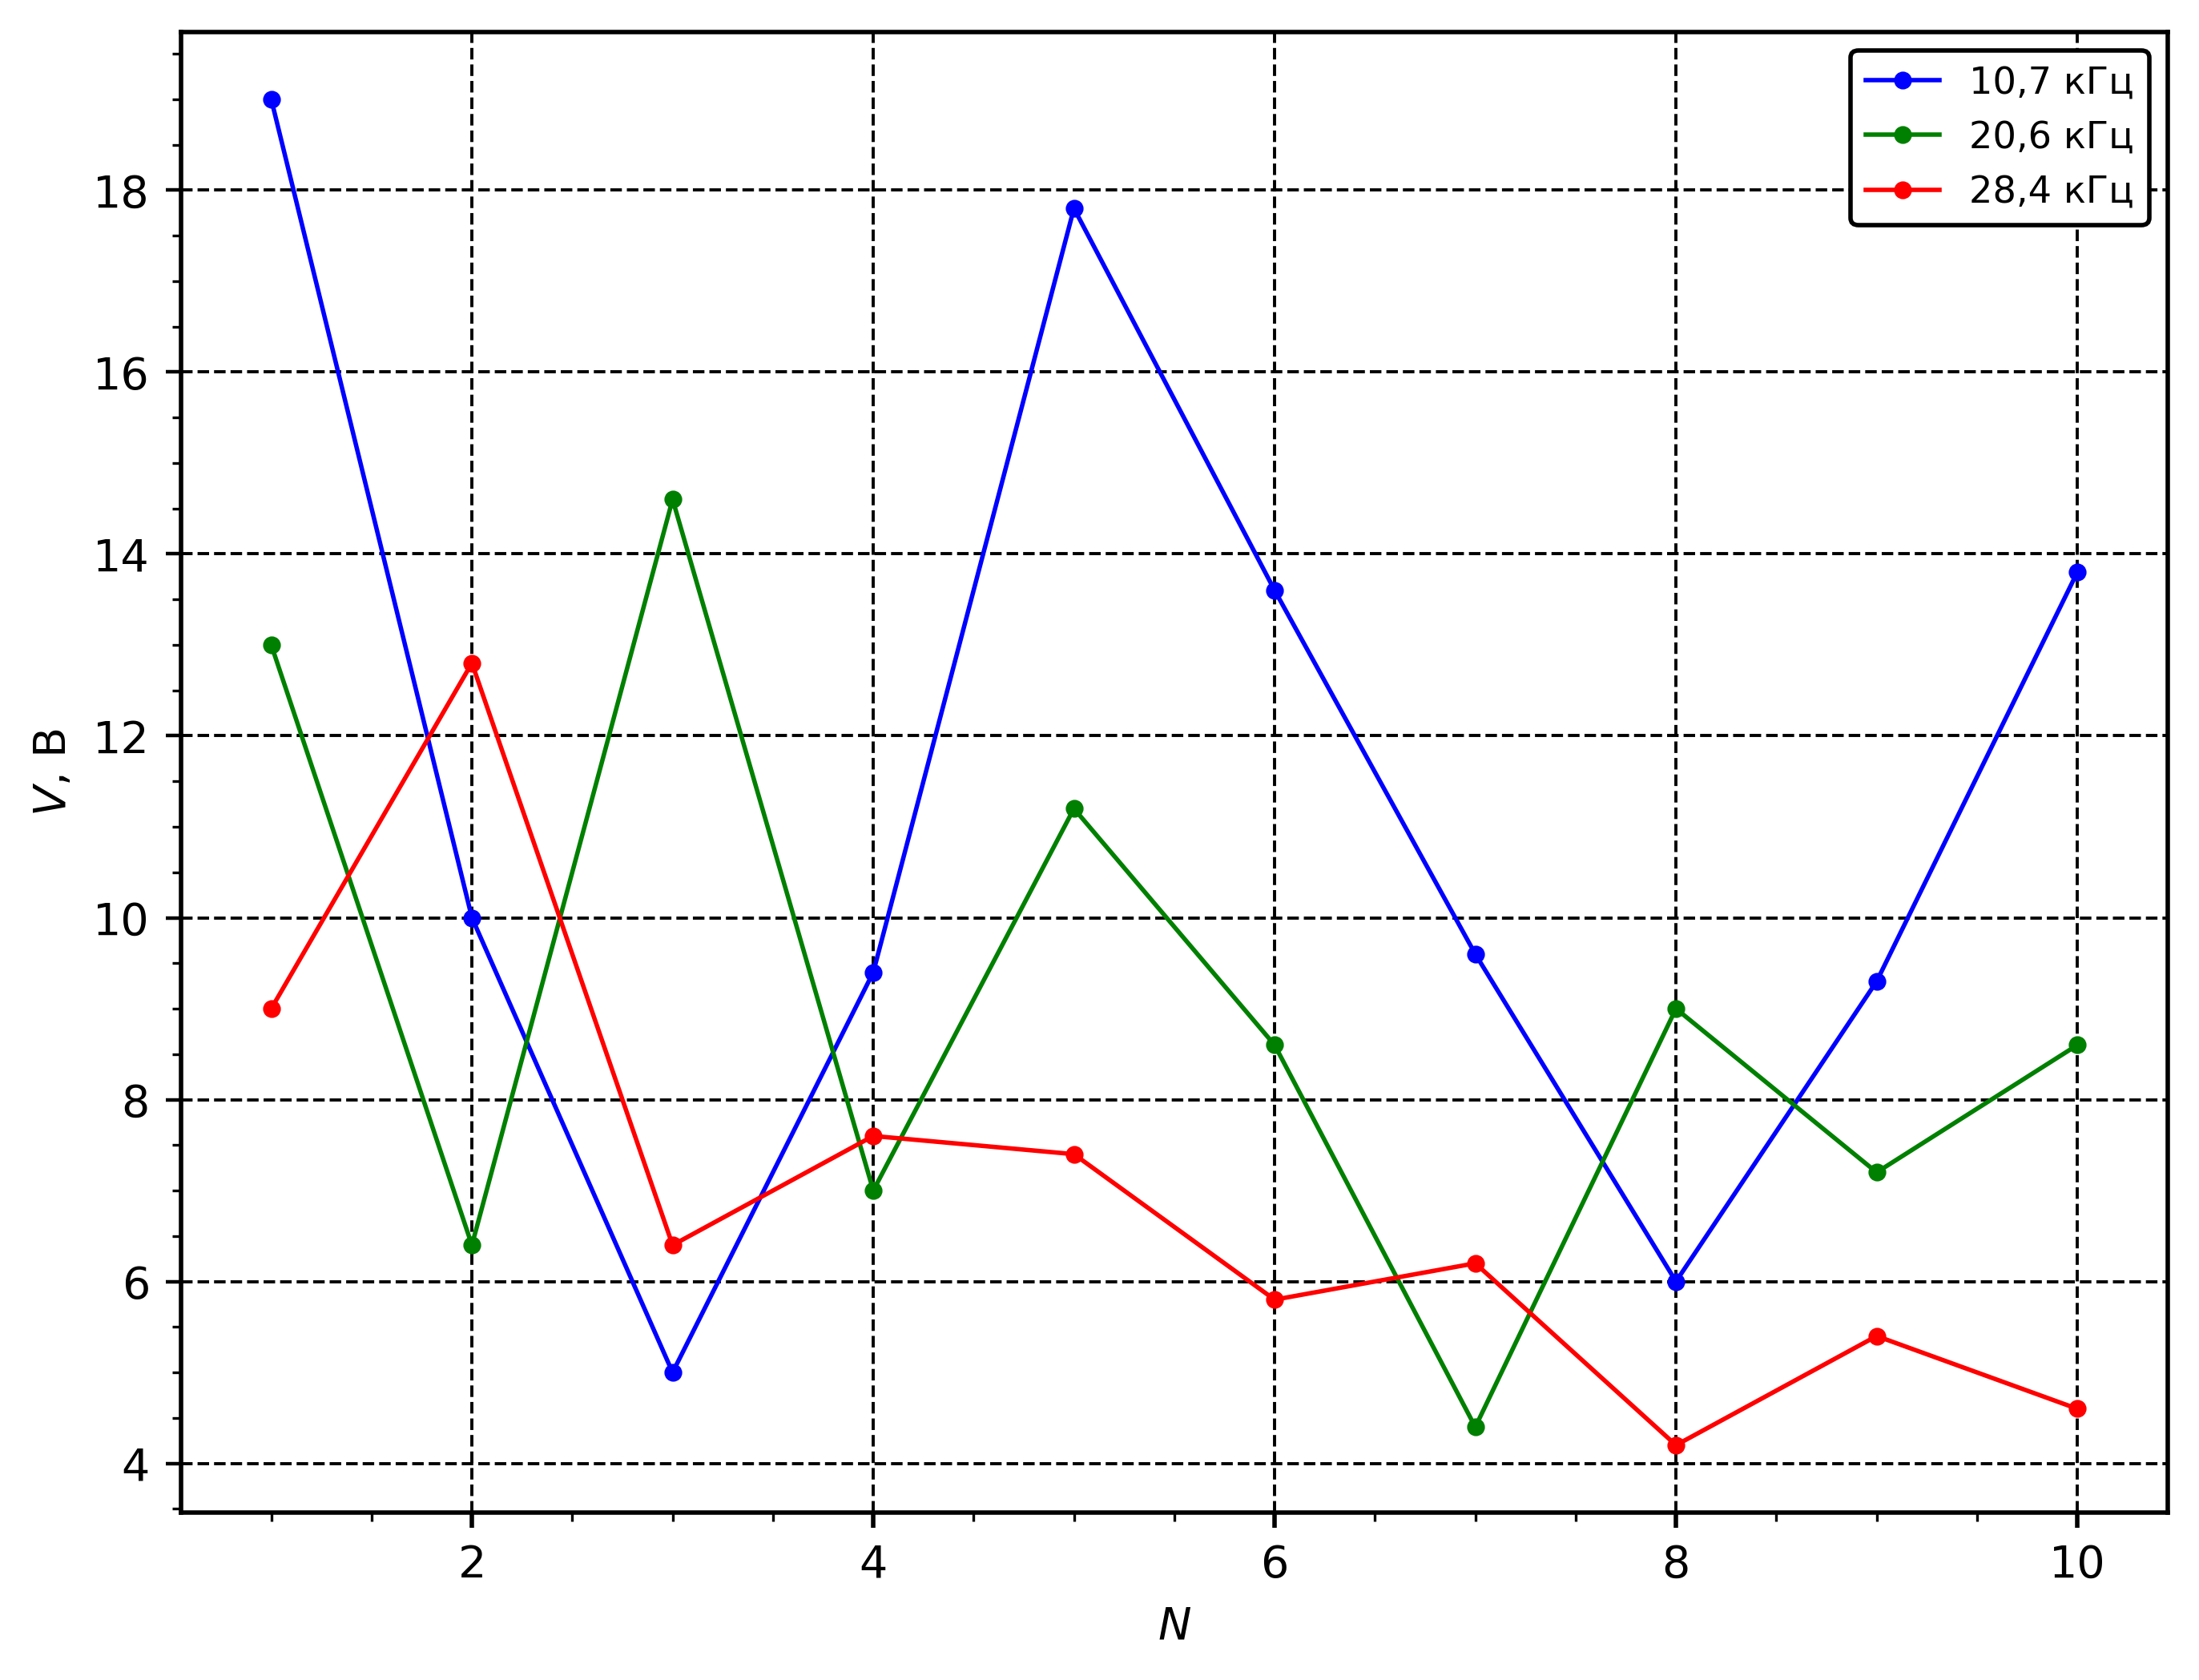

In [43]:
plot = lab.plot.Plot(yl="$V$", xl="$N$")
plot.plot(data["N"], data["u1"], fmt=".-", label="10,7 кГц")
plot.plot(data["N"], data["u2"], fmt=".-", label="20,6 кГц")
plot.plot(data["N"], data["u3"], fmt=".-", label="28,4 кГц")
plot.ax.legend()
plot.save("../img/us.png")